In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn
import pickle

In [2]:
dfOutcomes = pd.read_csv("sc1_Phase1_GE_Outcome.tsv",sep="\t")
dfOutcomes['SURVIVAL_STATUS'].value_counts()
dfOutcomes[dfOutcomes['SURVIVAL_STATUS'] == 1].sample(n=51)
dfOutcomes.head()

,PATIENTID,SURVIVAL_STATUS
0,patient_290,1
1,patient_394,1
2,patient_81,1
3,patient_307,1
4,patient_14,1


In [3]:
dfPhenotypes = pd.read_csv("sc1_Phase1_GE_Phenotype.tsv",sep="\t")
dfPhenotypes = dfPhenotypes.replace(r'^\s*$', np.nan, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^IV', 4, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^III', 3, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^II', 2, regex=True)
dfPhenotypes = dfPhenotypes.replace(r'^I', 1, regex=True)
dfPhenotypes['WHO_GRADING'].replace(np.nan, 0, regex=True,inplace=True)
dfPhenotypes.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE
0,patient_290,NaN,NaN,2.0,ASTROCYTOMA
1,patient_394,NaN,NaN,0.0,GBM
2,patient_81,NaN,NaN,3.0,ASTROCYTOMA
3,patient_307,NaN,NaN,0.0,UNCLASSIFIED
4,patient_14,NaN,NaN,0.0,GBM


In [4]:
dfFeatures = pd.read_csv("sc1_Phase1_GE_FeatureMatrix.tsv",sep="\t")
dfFeatures.head()

,PATIENTID,A1BG,A1BG.AS1,A1CF,A2M,A2M.AS1,A2ML1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,patient_290,6.557793,6.453623,5.302909,12.530607,6.082401,5.667769,6.764585,6.094459,6.240895,...,7.338461,8.616562,6.587933,6.034539,7.525232,5.847143,9.426022,10.027414,8.438376,8.853557
1,patient_394,6.323015,6.305724,5.552097,13.000489,6.263721,5.347906,6.723860,6.143284,6.256355,...,8.138918,9.463643,6.233711,6.174691,8.169813,5.988549,9.988564,11.577409,8.672737,9.205295
2,patient_81,6.669421,6.414214,5.478774,12.545510,5.940785,5.639510,6.752736,6.001829,6.148274,...,7.754430,9.229166,6.288666,5.957426,8.148327,6.190679,9.531540,11.180062,8.484453,8.856021
3,patient_307,6.502573,6.508156,5.648495,12.407083,6.414991,5.493800,6.912802,6.072980,6.318908,...,6.582457,8.851282,6.672033,6.194203,7.576931,6.422759,9.057685,10.062035,8.508903,7.742661
4,patient_14,6.624505,6.911232,5.614099,10.777103,6.236386,5.512900,7.178968,6.088447,6.091908,...,7.176397,7.618780,6.086676,6.096177,7.251395,6.090243,10.298209,9.443150,8.204315,8.606522


In [5]:
dfs = pd.merge(dfPhenotypes,dfOutcomes,how="inner",on="PATIENTID")
dfMerged = pd.merge(dfs,dfFeatures,how="inner",on="PATIENTID")
dfMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Columns: 19341 entries, PATIENTID to ZZZ3
dtypes: float64(19336), int64(1), object(4)
memory usage: 55.6+ MB


In [6]:
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNKNOWN']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'UNCLASSIFIED']
#dfMerged = dfMerged[dfMerged.CANCER_TYPE != 'MIXED']
#dfMerged = dfMerged[dfMerged.WHO_GRADING != 0]
dfCount = dfMerged[dfMerged['SURVIVAL_STATUS']==0]
dfCount.head()

,PATIENTID,SEX,RACE,WHO_GRADING,CANCER_TYPE,SURVIVAL_STATUS,A1BG,A1BG.AS1,A1CF,A2M,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
37,patient_654,MALE,WHITE,4.0,GBM,0,6.888966,6.919759,5.382967,12.801268,...,6.854620,7.365366,6.048575,5.966297,7.258182,6.013034,9.367449,9.538811,8.286802,8.667675
39,patient_253,MALE,WHITE,0.0,UNKNOWN,0,7.221225,6.741363,5.423092,10.374396,...,8.550822,10.933867,6.294878,6.281912,7.849890,7.782124,8.459885,8.536307,8.456778,9.196804
43,patient_375,FEMALE,WHITE,4.0,GBM,0,6.791863,6.872367,5.427558,12.467948,...,6.598569,8.258718,6.021195,5.960291,7.322752,6.385392,9.354172,9.746052,8.382402,8.677187
47,patient_113,FEMALE,WHITE,2.0,ASTROCYTOMA,0,7.311807,7.044221,5.411064,13.161513,...,7.288878,8.235849,6.376180,6.073544,7.275325,5.967357,9.289735,10.121427,8.246705,8.874775
51,patient_468,FEMALE,WHITE,4.0,GBM,0,6.743090,6.828674,5.518644,12.683945,...,7.271699,7.938821,5.977331,5.937261,7.213713,6.109388,9.676957,10.017874,8.236059,8.216178


In [7]:
dfMergedDownSampledOutcomes=pd.concat([
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 1].sample(n=len(dfCount.index)*6,replace=True),
        dfMerged[dfMerged['SURVIVAL_STATUS'] == 0].sample(n=len(dfCount.index)*5,replace=True)
])
dfMergedDownSampledOutcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 299 to 95
Columns: 19341 entries, PATIENTID to ZZZ3
dtypes: float64(19336), int64(1), object(4)
memory usage: 82.8+ MB


In [8]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, SelectKBest, f_regression, RFE, mutual_info_classif
X = dfMergedDownSampledOutcomes
X = X.drop(columns=['PATIENTID','SEX','WHO_GRADING','RACE','CANCER_TYPE','SURVIVAL_STATUS'])
y = dfMergedDownSampledOutcomes.iloc[:,4]
y.value_counts()

GBM                  202
ASTROCYTOMA          163
UNKNOWN              120
OLIGODENDROGLIOMA     65
MIXED                 10
UNCLASSIFIED           1
Name: CANCER_TYPE, dtype: int64

In [9]:
bestfeatures = SelectKBest(score_func=chi2, k=500)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Genes','Score']  #naming the dataframe columns
#print(featureScores.nlargest(200,'Score'))  #print 10 best features

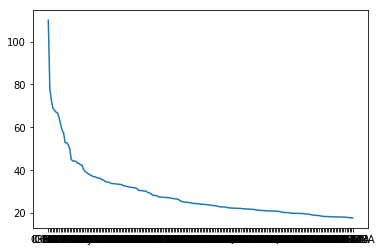

In [10]:
import matplotlib.pyplot as plt
Vals= featureScores.nlargest(200,'Score')  #print 10 best features
xVal = Vals['Genes']
yVal = Vals['Score']
plt.plot(xVal,yVal)  #print 10 best features
plt.show()

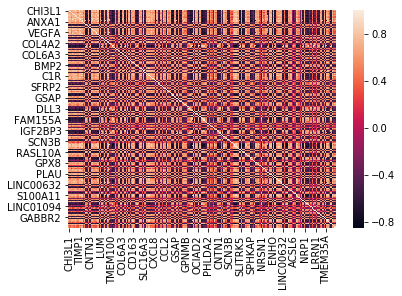

In [11]:
selCols = pd.Series(['SURVIVAL_STATUS'])
dfSelectedY = dfMergedDownSampledOutcomes.loc[:,selCols]
#xValDup = pd.Series(['CHI3L1','PTX3','COL3A1','IGFBP2','ADM','LTF','COL1A1'])
dfSelectedX = dfMergedDownSampledOutcomes.loc[:,xVal[0:]]
#print(dfSelectedX)

import seaborn as sns
corrMap = dfSelectedX.corr()
sns.heatmap(corrMap)

In [12]:
dfT = dfSelectedX
# Create correlation matrix
corr_matrix = dfT.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#print(upper)
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)


['COL1A1', 'COL1A2', 'COL4A1']


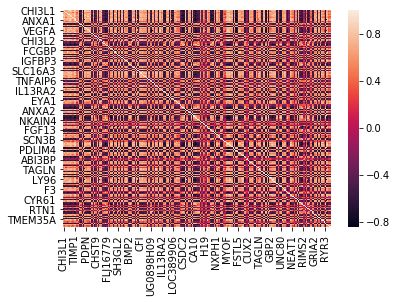

In [13]:
# Drop features 
dfT.drop(to_drop, axis=1,inplace=True)
corrMap = dfT.corr()
sns.heatmap(corrMap)
dfSelectedX = dfT

In [22]:
filehandle = open('sc1_phase1_features.txt', 'w')
filehandle.write(','.join(map(str, list(dfSelectedX))) )
filehandle.close()
list(dfSelectedX)
#dfSelectedX.to_csv(r'sc1_phase1_features.txt', header=None, index=None, sep=' ', mode='a')

['CHI3L1',
 'IGFBP2',
 'LTF',
 'COL3A1',
 'PTX3',
 'EMP3',
 'ADM',
 'POSTN',
 'TIMP1',
 'ANXA1',
 'MEOX2',
 'NNMT',
 'ETNPPL',
 'KLRC3',
 'CTHRC1',
 'CNTN3',
 'PDPN',
 'RBP1',
 'VEGFA',
 'LAMB1',
 'MCUB',
 'GPR17',
 'LUM',
 'SCG3',
 'CHST9',
 'SOD2',
 'KCND2',
 'CHI3L2',
 'COL4A2',
 'TOX3',
 'TMEM100',
 'SNAP91',
 'FLJ16779',
 'MOXD1',
 'SLC14A1',
 'SLC2A10',
 'FCGBP',
 'CSMD3',
 'COL6A3',
 'RAB34',
 'SH3GL2',
 'S100A8',
 'FERMT1',
 'LOXL1',
 'SUSD5',
 'IGFBP3',
 'CD163',
 'DIRAS3',
 'BMP2',
 'CHGB',
 'DCX',
 'LGALS3',
 'GBP1',
 'AKR1C3',
 'SLC16A3',
 'PLPPR1',
 'CFI',
 'SERPINE1',
 'C1R',
 'LOX',
 'GDF15',
 'CXCL8',
 'NOG',
 'TNFAIP6',
 'UG0898H09',
 'LINC00844',
 'METTL7B',
 'SFRP2',
 'MYL9',
 'CCL2',
 'PHACTR3',
 'COL5A2',
 'IL13RA2',
 'BCAT1',
 'DPP10',
 'GALNT13',
 'MGP',
 'GSAP',
 'SMOC1',
 'CAV2',
 'LOC389906',
 'EYA1',
 'PLAT',
 'SERPINA3',
 'F13A1',
 'GPNMB',
 'ARHGAP36',
 'DLL3',
 'CSDC2',
 'INA',
 'ANXA2',
 'B3GAT2',
 'PLIN2',
 'OCIAD2',
 'NSG2',
 'SERPING1',
 'CA10',
 'FAM1

In [23]:
####SVM####
from sklearn import svm
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

clf = svm.SVC(kernel='rbf',gamma='auto',decision_function_shape='ovr')
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

scaler = StandardScaler()

totScore=0
totSensitivity = 0
totSpecificity = 0
totAUC = 0
i=0
for train_index,test_index in cv.split(dfSelectedX,dfSelectedY):
    x_train, x_test = dfSelectedX.iloc[train_index], dfSelectedX.iloc[test_index]
    y_train, y_test = dfSelectedY.iloc[train_index], dfSelectedY.iloc[test_index]
    #print(x_train)
    #x_train = scaler.fit_transform(x_train)
    #x_test = scaler.fit_transform(x_test)
    
    #clf.fit(dfSelectedX, dfSelectedY.values.ravel())
    clf.fit(x_train, y_train.values.ravel())
    
    predictions = clf.predict(x_test)

    predY = pd.DataFrame(predictions,index= y_test.index, columns=['Predicted_type'])
    #print(predY)

    finalPred = pd.concat([y_test,predY],axis=1)
    #print(finalPred)
    print(multilabel_confusion_matrix(y_test, predictions))
    print("\n-----------------------------")
    tn,fp,fn,tp = confusion_matrix(y_test, predictions).ravel()
    print(" tn\tfp\tfn\t tp\n",tn,"\t",fp,"\t",fn,"\t",tp)
    score = clf.score(x_test, y_test)
    sensitivity = tp*100/(tp+fn)
    specificity = tn*100/(tn+fp)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
    auc = metrics.auc(fpr, tpr)
    print("\naccuracy:", score)
    print("sensitivity:", sensitivity)
    print("specificity:", specificity)
    print("AUC:", auc)
    print("-----------------------------\n")
    
    totScore = totScore + score
    totSensitivity = totSensitivity + sensitivity
    totSpecificity = totSpecificity + specificity
    totAUC = totAUC + auc
    i=i+1
    
print("average accuracy:", totScore/i)
print("average sensitivity:", totSensitivity/i)
print("average specificity:", totSpecificity/i)
print("average AUC:", totAUC/i)



[[[29  2]
  [ 0 26]]

 [[26  0]
  [ 2 29]]]

-----------------------------
 tn	fp	fn	 tp
 26 	 0 	 2 	 29

accuracy: 0.9649122807017544
sensitivity: 93.54838709677419
specificity: 100.0
AUC: 0.967741935483871
-----------------------------

[[[31  0]
  [ 2 24]]

 [[24  2]
  [ 0 31]]]

-----------------------------
 tn	fp	fn	 tp
 24 	 2 	 0 	 31

accuracy: 0.9649122807017544
sensitivity: 100.0
specificity: 92.3076923076923
AUC: 0.9615384615384616
-----------------------------

[[[31  0]
  [ 0 26]]

 [[26  0]
  [ 0 31]]]

-----------------------------
 tn	fp	fn	 tp
 26 	 0 	 0 	 31

accuracy: 1.0
sensitivity: 100.0
specificity: 100.0
AUC: 1.0
-----------------------------

[[[29  2]
  [ 0 26]]

 [[26  0]
  [ 2 29]]]

-----------------------------
 tn	fp	fn	 tp
 26 	 0 	 2 	 29

accuracy: 0.9649122807017544
sensitivity: 93.54838709677419
specificity: 100.0
AUC: 0.967741935483871
-----------------------------

[[[30  1]
  [ 1 25]]

 [[25  1]
  [ 1 30]]]

-----------------------------
 tn	fp

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfSelectedX, dfSelectedY, test_size=0.01, random_state=42)
clf.fit(x_train, y_train.values.ravel())
finalFile = "sc1_phase1_model.sav"
pickle.dump(clf, open(finalFile, 'wb'))
